**Gaining Insights Into The Wine Reviews Dataset**
1. [Top 10 Wine Producing Countries - Number Of Wines Produced](#section1)
2. [Top 10 Wineries Producing Countries - Number Of Wines Produced](#section2)
3. [Top 10 Wine Tasters - Number Of Wines Tasted](#section3)
4. [Points Given To Wines Produced By Top 10 Wineries - Number Of Wines Produced](#section4)
5. [Points Given To Wines Belonging To Top 10 Varieties](#section5)
6. [Distribution Of Points Given To Top 5 Wine Varieties](#section6)
7. [Distribution Of Points & Price Of Wine < 100](#section7)
8. [Visualising Distribution Of Wines In Various Price Groups](#section8)
9. [Top 5 Wine Producing Countries - Highest Rated](#section9)
10. [Top 5 Wine Producing Countries - Expensive Wines](#section10)
11. [Top 5 Wine Producing Countries - Cheapest Wines](#section11)

**Please UPVOTE The Kernel, If You Liked It**

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Importing Dataset

In [2]:
dataset = pd.read_csv('input/winemag-data-130k-v2.csv')

In [3]:
dataset.drop(dataset.columns[0],axis = 1,inplace=True)
dataset.head()

country                                        description  \
0     Italy  Aromas include tropical fruit, broom, brimston...   
1  Portugal  This is ripe and fruity, a wine that is smooth...   
2        US  Tart and snappy, the flavors of lime flesh and...   
3        US  Pineapple rind, lemon pith and orange blossom ...   
4        US  Much like the regular bottling from 2012, this...   

                          designation  points  price           province  \
0                        Vulkà Bianco      87    NaN  Sicily & Sardinia   
1                            Avidagos      87   15.0              Douro   
2                                 NaN      87   14.0             Oregon   
3                Reserve Late Harvest      87   13.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   

              region_1           region_2         taster_name  \
0                 Etna                NaN       Kerin O’Keefe   
1                  NaN                NaN          Roger Voss   
2    Willamette Valley  Willamette Valley        Paul Gregutt   
3  Lake Michigan Shore                NaN  Alexander Peartree   
4    Willamette Valley  Willamette Valley        Paul Gregutt   

  taster_twitter_handle                                              title  \
0          @kerinokeefe                  Nicosia 2013 Vulkà Bianco  (Etna)   
1            @vossroger      Quinta dos Avidagos 2011 Avidagos Red (Douro)   
2           @paulgwine       Rainstorm 2013 Pinot Gris (Willamette Valley)   
3                   NaN  St. Julian 2013 Reserve Late Harvest Riesling ...   
4           @paulgwine   Sweet Cheeks 2012 Vintner's Reserve Wild Child...   

          variety               winery  
0     White Blend              Nicosia  
1  Portuguese Red  Quinta dos Avidagos  
2      Pinot Gris            Rainstorm  
3        Riesling           St. Julian  
4      Pinot Noir         Sweet Cheeks

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


<a id = 'section1'></a>

## Top 10 Wine Producing Countries - Number Of Wines Produced

In [5]:
countries_list = pd.DataFrame(dataset.country.value_counts(dropna = True)).iloc[0:10]
countries_list['Index'] = list(range(0,10))
countries_list['Country_Name'] = countries_list.index.values
countries_list.set_index('Index',inplace = True)
countries_list.columns = ['Number Of Wines Produced','Country']
#Top 10 Wine Producing Countries
countries_list

Number Of Wines Produced    Country
Index                                     
0                         54504         US
1                         22093     France
2                         19540      Italy
3                          6645      Spain
4                          5691   Portugal
5                          4472      Chile
6                          3800  Argentina
7                          3345    Austria
8                          2329  Australia
9                          2165    Germany

Text(0.5, 0, 'Number Of Wines Produced')

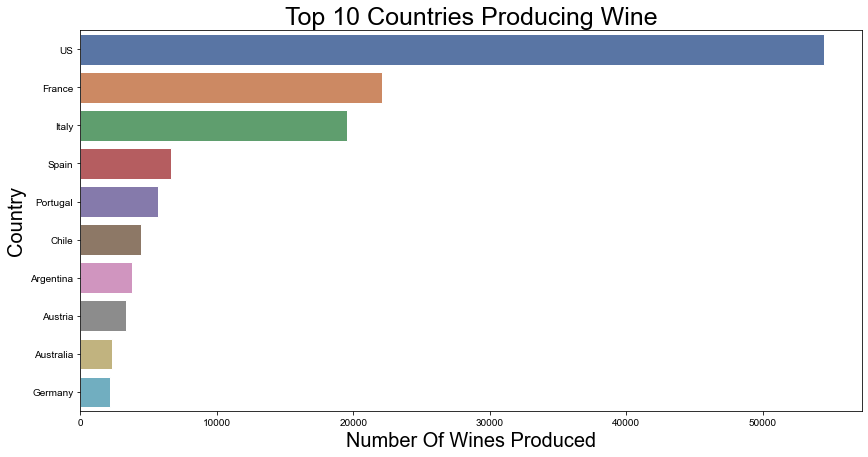

In [6]:
fig, ax = plt.subplots(figsize=(14,7))
sns.set(style="whitegrid")
ax = sns.barplot(y="Country", x="Number Of Wines Produced", data=countries_list)
plt.title("Top 10 Countries Producing Wine",fontsize = 25)
plt.ylabel("Country",fontsize = 20)
plt.xlabel("Number Of Wines Produced",fontsize = 20)

<a id = 'section2'></a>

## Top 10 Wineries Producing Countries - Number Of Wines Produced

In [7]:
winery_list = pd.DataFrame(dataset.winery.value_counts(dropna = True)).iloc[0:10]
winery_list['Index'] = list(range(0,10))
winery_list['Winery_Name'] = winery_list.index.values
winery_list.set_index('Index',inplace = True)
winery_list.columns = ['Number Of Wines Produced','Winery']
#Top 10 Wine Producing Wineries
winery_list

Number Of Wines Produced                 Winery
Index                                                 
0                           222     Wines & Winemakers
1                           218             Testarossa
2                           215             DFJ Vinhos
3                           211        Williams Selyem
4                           199           Louis Latour
5                           196        Georges Duboeuf
6                           194  Chateau Ste. Michelle
7                           164          Concha y Toro
8                           159         Columbia Crest
9                           130        Kendall-Jackson

In [8]:
fig, ax = plt.subplots(figsize=(14,7))
sns.set(style="whitegrid")
sns.barplot(y="Winery", x="Number Of Wines Produced", data=winery_list)
plt.title("Top 10 Wineries Producing Wine",fontsize = 25)
plt.ylabel("Winery",fontsize = 20)
plt.xlabel("Number Of Wines Produced",fontsize = 20)

Text(0.5, 0, 'Number Of Wines Produced')

<a id = 'section3'></a>

## Top 10 Wine Tasters - Number Of Wines Tasted

In [9]:
taster_list = pd.DataFrame(dataset.taster_name.value_counts(dropna = True)).iloc[0:10]
taster_list['Index'] = list(range(0,10))
taster_list['Taster_Name'] = taster_list.index.values
taster_list.set_index('Index',inplace = True)
taster_list.columns = ['Number Of Wines Tasted','Taster Name']
#Top 10 Wine Tasters
taster_list

Number Of Wines Tasted         Taster Name
Index                                            
0                       25514          Roger Voss
1                       15134   Michael Schachner
2                       10776       Kerin O’Keefe
3                        9537      Virginie Boone
4                        9532        Paul Gregutt
5                        6332       Matt Kettmann
6                        5147      Joe Czerwinski
7                        4966    Sean P. Sullivan
8                        4415  Anna Lee C. Iijima
9                        4177          Jim Gordon

Text(0.5, 0, 'Number Of Wines Tasted')

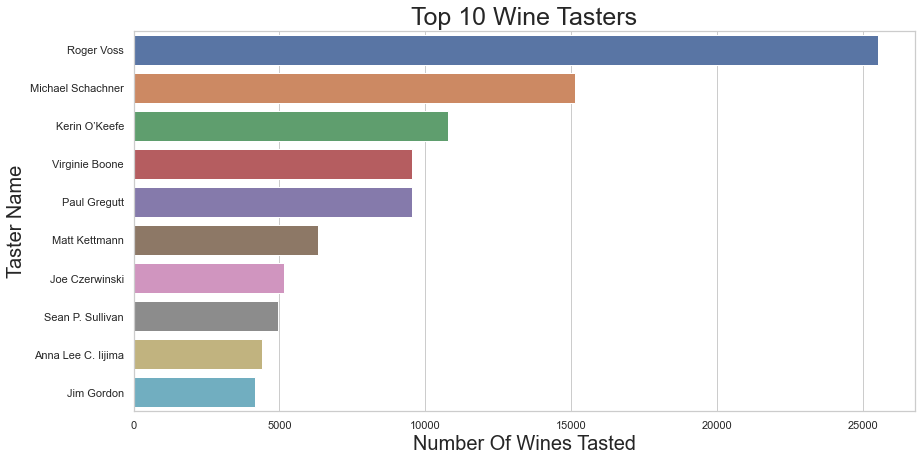

In [10]:
fig, ax = plt.subplots(figsize=(14,7))
sns.set(style="whitegrid")
ax = sns.barplot(y="Taster Name", x="Number Of Wines Tasted", data=taster_list)
plt.title("Top 10 Wine Tasters",fontsize = 25)
plt.ylabel("Taster Name",fontsize = 20)
plt.xlabel("Number Of Wines Tasted",fontsize = 20)

<a id = 'section4'></a>

## Points Given To Wines Produced By Top 10 Wineries - Number Of Wines Produced

In [11]:
#Visualising The Points Given To Wines From Top 10 Wineries
wineries_points = dataset[['points','winery']]
wineries_points = wineries_points[wineries_points.winery.isin(winery_list.Winery)]
fig, ax = plt.subplots(figsize=(25,15))
sns.set_style("whitegrid")
sns.violinplot(x="winery", y="points", data=wineries_points)
plt.ylabel("Points",fontsize = 25)
plt.xlabel("Wineries",fontsize = 25)
plt.title("Points Given To Wines Produced By Top 10 Wineries",fontsize = 30)

Text(0.5, 1.0, 'Points Given To Wines Produced By Top 10 Wineries')

<a id = 'section5'></a>

## Points Given To Wines Belonging To Top 10 Varieties

In [12]:
top_10_variety = pd.DataFrame(dataset['variety'].value_counts()[0:10])
top_10_variety['Index'] = list(range(0,10))
top_10_variety['Variety_Name'] = top_10_variety.index.values
top_10_variety.set_index('Index',inplace = True)
top_10_variety

variety              Variety_Name
Index                                   
0        13272                Pinot Noir
1        11753                Chardonnay
2         9472        Cabernet Sauvignon
3         8946                 Red Blend
4         6915  Bordeaux-style Red Blend
5         5189                  Riesling
6         4967           Sauvignon Blanc
7         4142                     Syrah
8         3564                      Rosé
9         3102                    Merlot

Text(0.5, 1.0, 'Points Given To Wines Belonging To Top 10 Varieties')

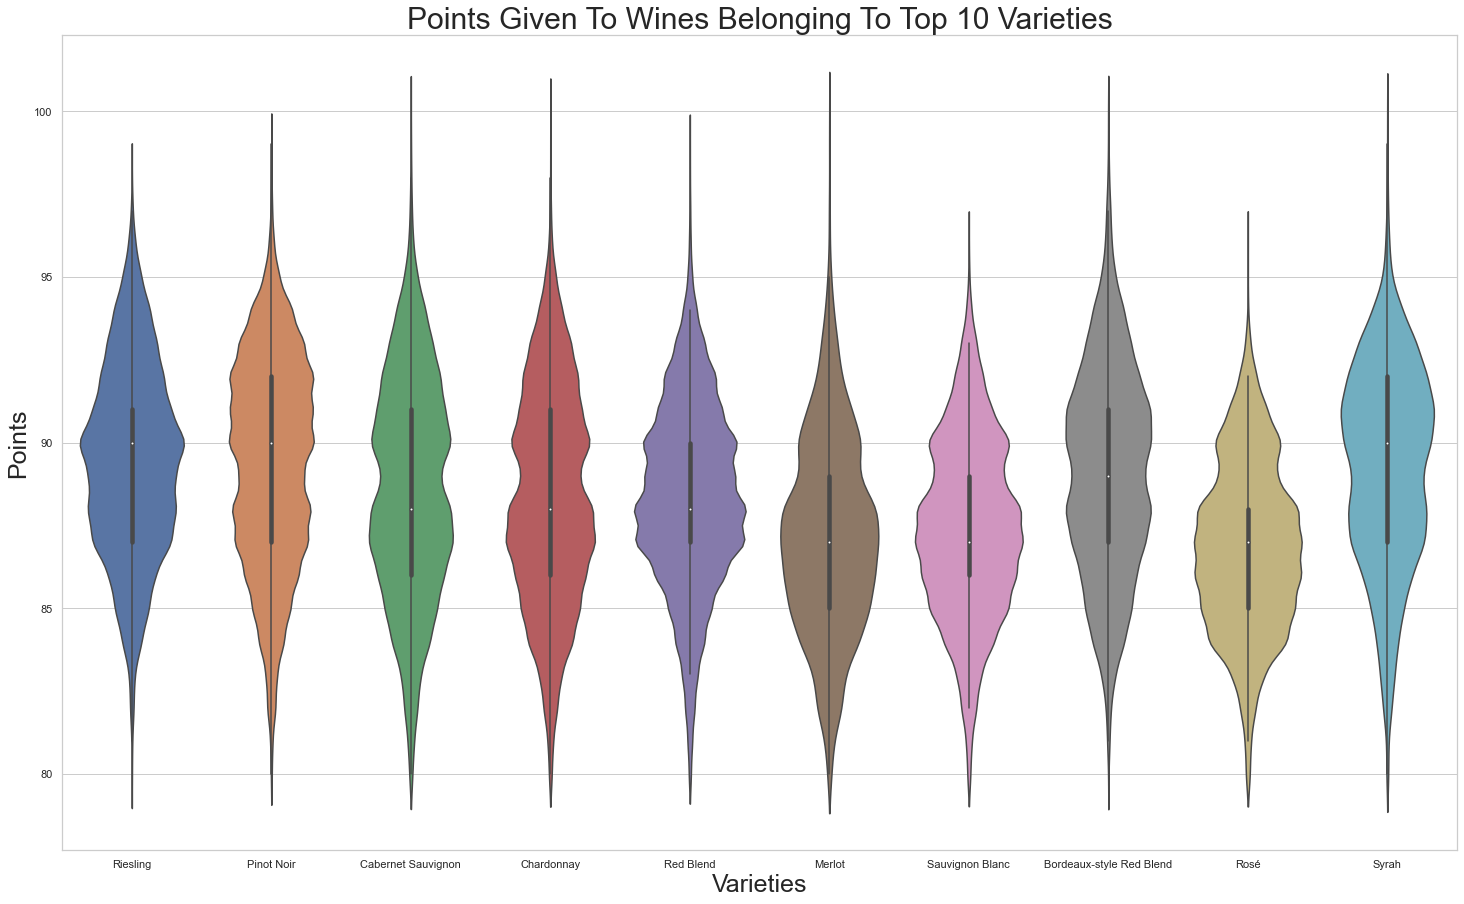

In [13]:
#Visualising The Points Given To Wines From Top 10 Varieties
varieties_points = dataset[['points','variety']]
varieties_points = varieties_points[varieties_points.variety.isin(top_10_variety.Variety_Name)]
fig, ax = plt.subplots(figsize=(25,15))
sns.set_style("whitegrid")
sns.violinplot(x="variety", y="points", data=varieties_points)
plt.ylabel("Points",fontsize = 25)
plt.xlabel("Varieties",fontsize = 25)
plt.title("Points Given To Wines Belonging To Top 10 Varieties",fontsize = 30)

<a id = 'section6'></a>

## Distribution Of Points Given To Top 5 Wine Varieties

In [14]:
res = pd.DataFrame(dataset[dataset['variety'] == 'Pinot Noir'].groupby('points').count()).iloc[:,0]
variety_points_dist = res
res = pd.DataFrame(dataset[dataset['variety'] == 'Chardonnay'].groupby('points').count()).iloc[:,0]
variety_points_dist = pd.concat([variety_points_dist,res],axis = 1)
res = pd.DataFrame(dataset[dataset['variety'] == 'Cabernet Sauvignon'].groupby('points').count()).iloc[:,0]
variety_points_dist = pd.concat([variety_points_dist,res],axis = 1)
res = pd.DataFrame(dataset[dataset['variety'] == 'Red Blend'].groupby('points').count()).iloc[:,0]
variety_points_dist = pd.concat([variety_points_dist,res],axis = 1)
res = pd.DataFrame(dataset[dataset['variety'] == 'Bordeaux-style Red Blend'].groupby('points').count()).iloc[:,0]
variety_points_dist = pd.concat([variety_points_dist,res],axis = 1)
variety_points_dist.columns = ['Pinot Noir','Chardonnay','Cabernet Sauvignon','Red Blend','Bordeaux-style Red Blend']
variety_points_dist

Pinot Noir  Chardonnay  Cabernet Sauvignon  Red Blend  \
points                                                          
80            16.0          46                  41       25.0   
81            39.0          86                  82       56.0   
82           150.0         222                 176      114.0   
83           197.0         350                 246      184.0   
84           452.0         733                 507      350.0   
85           684.0         954                 687      512.0   
86           969.0        1125                 859      832.0   
87          1328.0        1467                1128     1325.0   
88          1434.0        1392                1064     1351.0   
89          1111.0         859                 697     1053.0   
90          1559.0        1336                1102     1150.0   
91          1474.0         986                 880      757.0   
92          1528.0         897                 777      624.0   
93          1173.0         671                 567      353.0   
94           753.0         373                 383      161.0   
95           273.0         176                 170       53.0   
96            89.0          50                  59       20.0   
97            28.0          19                  27       10.0   
98            10.0           4                  12        3.0   
99             2.0           3                   5        2.0   
100            NaN           1                   1        NaN   

        Bordeaux-style Red Blend  
points                            
80                             3  
81                            23  
82                            45  
83                           127  
84                           310  
85                           450  
86                           523  
87                           710  
88                           849  
89                           652  
90                           828  
91                           823  
92                           588  
93                           429  
94                           299  
95                           132  
96                            60  
97                            40  
98                            14  
99                             5  
100                            5

In [15]:
variety_points_dist.plot.bar(stacked = True,figsize = (15,8),grid = False)
plt.title("Visualising Points For Top 5 Wine Varieties",fontsize = 25)
plt.xlabel("Points",fontsize = 20)

Text(0.5, 0, 'Points')

<a id = 'section7'></a>

## Distribution Of Points & Price Of Wine < 100

In [16]:
sns.jointplot(x='price', y='points', data=dataset[dataset['price']<100], kind='hex', gridsize=20)

<a id = 'section8'></a>

## Visualising Distribution Of Wines In Various Price Groups

#### Group 1 : 0 - 30
#### Group 2 : 30 - 80
#### Group 3 : 80 - 150
#### Group 4 : 150 - 500
#### Group 5 : Above 500

In [17]:
def price_group(pr):
    if(pr>0 and pr<30):
        return 1
    elif(pr >= 30 and pr < 80):
        return 2
    elif(pr >= 80 and pr < 150):
        return 3
    elif(pr >= 150 and pr < 500):
        return 4
    else:
        return 5

In [18]:
dataset['Price_Group'] = dataset['price'].apply(price_group)
counts = list(dataset['Price_Group'].value_counts())

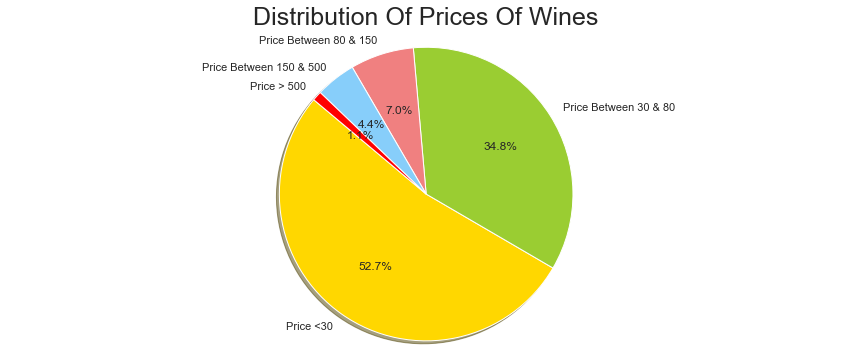

In [19]:
labels = ['Price <30','Price Between 30 & 80','Price Between 80 & 150','Price Between 150 & 500','Price > 500']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','red']
plt.figure(figsize = (15,6)) 
plt.pie(counts,labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Distribution Of Prices Of Wines",fontsize = 25)
plt.axis('equal')
plt.show()

<a id = 'section9'></a>

## Top 5 Wine Producing Countries - Highest Rated

In [20]:
top_5_countries_pw = dataset.groupby('country').mean().sort_values(by = ['points'],ascending = False)
top_5_countries_pw = pd.DataFrame(top_5_countries_pw.iloc[0:5,0])
top_5_countries_pw['Index'] = list(range(5))
top_5_countries_pw['Country'] = top_5_countries_pw.index.values
top_5_countries_pw.set_index(['Index'],inplace = True)
top_5_countries_pw

points  Country
Index                    
0      91.581081  England
1      90.222222    India
2      90.101345  Austria
3      89.851732  Germany
4      89.369650   Canada

In [21]:
top_5_countries_cnt = dataset.groupby('country').count()
top_5_countries_cnt['Index'] = list(range(len(top_5_countries_cnt)))
top_5_countries_cnt['Country'] = top_5_countries_cnt.index.values
top_5_countries_cnt.set_index(['Index'],inplace = True)
top_5_countries_cnt = top_5_countries_cnt[top_5_countries_cnt.Country.isin(top_5_countries_pw.Country)]
disp = top_5_countries_cnt[['Country','winery']]
disp.columns = ['Country','Number Of Wines Produced']
disp

Country  Number Of Wines Produced
Index                                   
3      Austria                      3345
7       Canada                       257
14     England                        74
17     Germany                      2165
20       India                         9

In [22]:
fig, ax = plt.subplots(figsize=(14,7))
sns.set(style="whitegrid")
ax = sns.barplot(y="Country", x="variety", data=top_5_countries_cnt)
plt.title("Top 5 Wine Producing Countries",fontsize = 25)
plt.ylabel("Country Name",fontsize = 20)
plt.xlabel("Number Of Wines Produced",fontsize = 20)

Text(0.5, 0, 'Number Of Wines Produced')

<a id = 'section10'></a>

## Top 5 Wine Producing Countries - Expensive Wines

In [23]:
top_5_countries_prw = dataset.groupby('country').mean().sort_values(by = ['price'],ascending = False)
top_5_countries_prw = pd.DataFrame(top_5_countries_prw.iloc[0:5,1])
top_5_countries_prw['Index'] = list(range(5))
top_5_countries_prw['Country'] = top_5_countries_prw.index.values
top_5_countries_prw.set_index(['Index'],inplace = True)
top_5_countries_prw

price      Country
Index                        
0      85.285714  Switzerland
1      51.681159      England
2      42.257547      Germany
3      41.139120       France
4      40.648276      Hungary

In [24]:
top_5_countries_cnt = dataset.groupby('country').count()
top_5_countries_cnt['Index'] = list(range(len(top_5_countries_cnt)))
top_5_countries_cnt['Country'] = top_5_countries_cnt.index.values
top_5_countries_cnt.set_index(['Index'],inplace = True)
top_5_countries_cnt = top_5_countries_cnt[top_5_countries_cnt.Country.isin(top_5_countries_prw.Country)]
disp = top_5_countries_cnt[['Country','winery']]
disp.columns = ['Country','Number Of Wines Produced']
disp

Country  Number Of Wines Produced
Index                                       
14         England                        74
15          France                     22093
17         Germany                      2165
19         Hungary                       146
38     Switzerland                         7

Text(0.5, 0, 'Number Of Wines Produced')

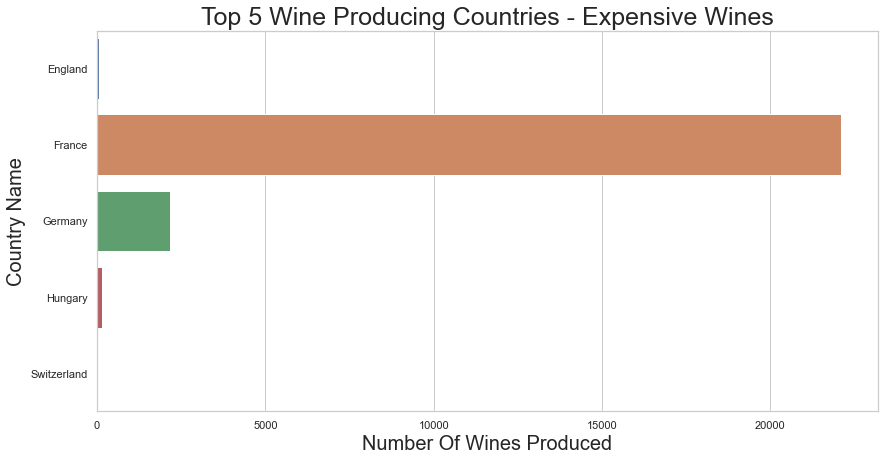

In [25]:
fig, ax = plt.subplots(figsize=(14,7))
sns.set(style="whitegrid")
ax = sns.barplot(y="Country", x="variety", data=top_5_countries_cnt)
plt.title("Top 5 Wine Producing Countries - Expensive Wines",fontsize = 25)
plt.ylabel("Country Name",fontsize = 20)
plt.xlabel("Number Of Wines Produced",fontsize = 20)

<a id = 'section11'></a>

## Top 5 Wine Producing Countries - Cheapest Wines

In [26]:
top_5_countries_prwl = dataset.groupby('country').mean().sort_values(by = ['price'],ascending = True)
top_5_countries_prwl = pd.DataFrame(top_5_countries_prwl.iloc[0:5,1])
top_5_countries_prwl['Index'] = list(range(5))
top_5_countries_prwl['Country'] = top_5_countries_prwl.index.values
top_5_countries_prwl.set_index(['Index'],inplace = True)
top_5_countries_prwl

price                 Country
Index                                   
0       9.214286                 Ukraine
1      12.500000  Bosnia and Herzegovina
2      13.333333                   India
3      14.500000                 Armenia
4      14.645390                Bulgaria

In [27]:
top_5_countries_cnt = dataset.groupby('country').count()
top_5_countries_cnt['Index'] = list(range(len(top_5_countries_cnt)))
top_5_countries_cnt['Country'] = top_5_countries_cnt.index.values
top_5_countries_cnt.set_index(['Index'],inplace = True)
top_5_countries_cnt = top_5_countries_cnt[top_5_countries_cnt.Country.isin(top_5_countries_prwl.Country)]
disp = top_5_countries_cnt[['Country','winery']]
disp.columns = ['Country','Number Of Wines Produced']
disp

Country  Number Of Wines Produced
Index                                                  
1                     Armenia                         2
4      Bosnia and Herzegovina                         2
6                    Bulgaria                       141
20                      India                         9
41                    Ukraine                        14

Text(0.5, 0, 'Number Of Wines Produced')

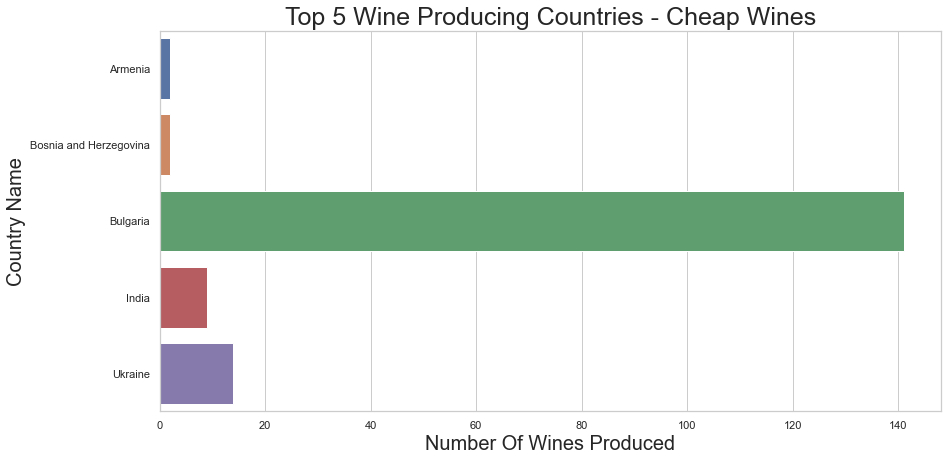

In [28]:
fig, ax = plt.subplots(figsize=(14,7))
sns.set(style="whitegrid")
ax = sns.barplot(y="Country", x="variety", data=top_5_countries_cnt)
plt.title("Top 5 Wine Producing Countries - Cheap Wines",fontsize = 25)
plt.ylabel("Country Name",fontsize = 20)
plt.xlabel("Number Of Wines Produced",fontsize = 20)